<a href="https://colab.research.google.com/github/VinZCodz/machine-learning-works/blob/main/polynomial_regression/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lets understand Nuanced Regression!

> Note! Please add other files given in the repo, to Files section of this notebook, for the all the things to work properly. Those are libraries used to run some routines.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

## Data behaviour and plotting st.line.

Lets observe certain data behaviours and visualize on a plot.

In [ ]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.title("1st set")
plt.show()

x = np.arange(0, 20, 1)
y = 1 + x**2

print(f'')

plt.scatter(x, y, marker='x', c='r', label="Actual Value");
plt.title("2nd set")
plt.show()

Lets try to make Prediction with know tool of st.line plot aka Linear Regression



In [ ]:
x = np.arange(0, 20, 1)
y = [100,90,80,60,60,55,60,65,70,70,73,75,76,78,79,80,90,99,99,100]
X = x.reshape(-1, 1)

model_w,model_b = run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-2)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Try Fit St.Line")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Not at all a fit!

Seems like the actual values are not variating linearly! seems st.line wont best serve the need.
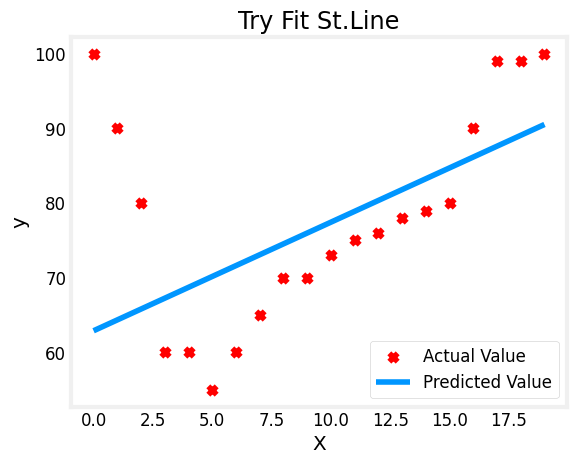

Curve, of some sort, seems to be a more fit.

A curve which is more senetive to such Nuanced variations, may serve right!! Something like below will respect all plots.

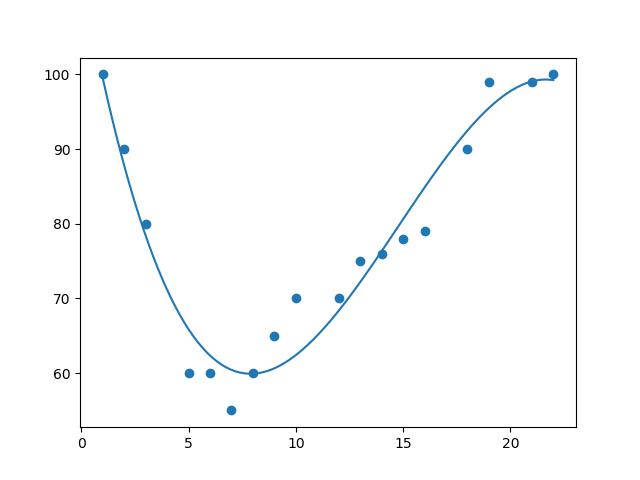



## Thus the need for Curve and Mathamatically curve is Polynomial variation.

So the need to fit all such non-linear variations leeds to forming an equation which will have many variating terms/features whose plots are non linear in a way!

Example: as simple quadratic eq: 𝑦=1+𝑥^2 plots can be checked!

So lets try ploting x^2 variations on the above plots, which means calculating x^2 for each values of x, lets call it X and pass this X to run the descent and check. whether it fits!!!

In [ ]:
x = np.arange(0, 20, 1)
y = x**2
X = np.c_[x**2]

model_w,model_b = run_gradient_descent_feng(X,y,iterations=10000, alpha = 1e-7)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Try Fitting Curve")
plt.plot(x,np.dot(X,model_w) + model_b , label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

A perfect fit when the feature X is non linear i.e qaudratic in this case and in general a curve passing thru all true values: Mathamatically a Polynomial eq. or plots.


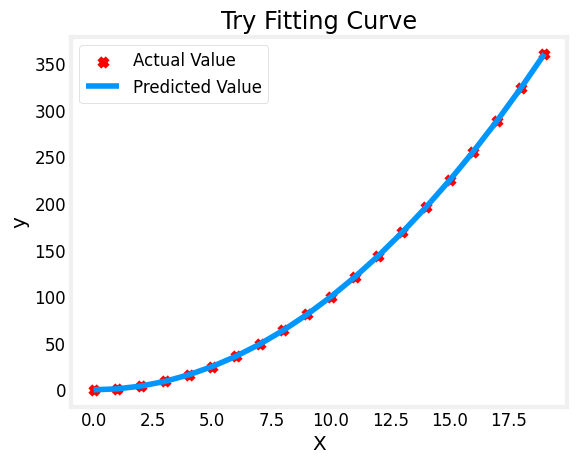

# Introduction to Polynomial Regression

Polynomial regression is a regression technique that models non-linear relationships between an independent variable (x) and a dependent variable (y) by fitting a polynomial equation to the data. Unlike linear regression, which assumes a straight-line relationship, polynomial regression captures curved patterns by adding higher-degree terms of the independent variable (like x², x³, etc.) to the model. This allows for more complex and flexible data fitting, representing relationships that cannot be adequately described by a straight line.

## Lets select the degree of such equations.

Lets try greedy and see what happens if we add higer degree.

For example, what if we had instead tried :  𝑦=𝑤0𝑥0+𝑤1𝑥^2+𝑤2𝑥^3+𝑏?

of the order 3.

Lets see the weights and bias via descent for such eq along with a plot?

In [ ]:
x = np.arange(0, 20, 1)
y = x**2
X = np.c_[x, x**2, x**3]

model_w,model_b = run_gradient_descent_feng(X,y,iterations=10000, alpha = 1e-7)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Try Fitting more perfect Curve")
plt.plot(x,np.dot(X,model_w) + model_b , label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

some observation:
1. we see curve fits well
2. values for w vector are

> w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106

which says, x^2 has more weight of 0.54 compared to other features. Thus,


> Gradient descent is picking the 'correct' features for us by emphasizing its associated parameter.

**Thus the model degree and eq best fit for given data is  w*x^2+b**

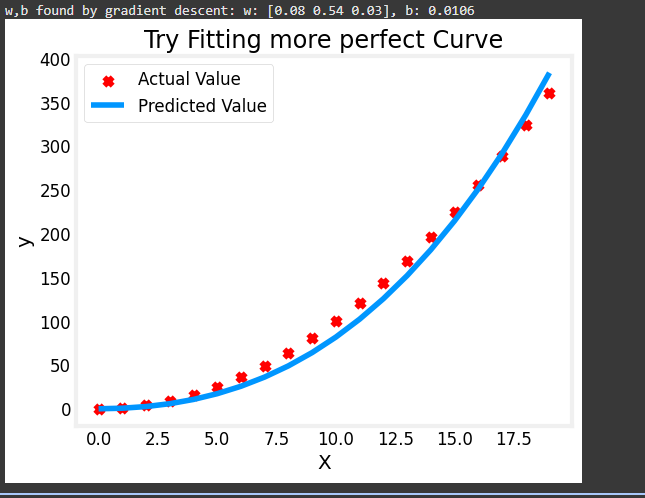

## okay what if features are scaled? Normalized to be in same range!

In [ ]:
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# add mean_normalization
X = zscore_normalize_features(X)
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

**Summary**

Same observation:

we see curve fits very well this time.

But,

> w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000

which again say: x^2 has more weight as compared to other features.

Thus,

Gradient descent is picking the 'correct' features for us by emphasizing its associated parameter.

> Feature scaling allows this to converge much faster.
Note again the values of  𝐰
 . The  𝑤1
  term, which is the  𝑥2
  term is the most emphasized. Gradient descent has all but eliminated the  𝑥3
  term.

**Thus the model degree and eq best fit for given data is w*x^2+b**
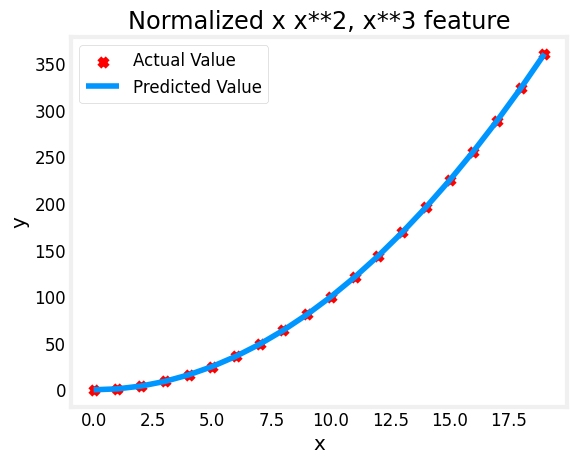

# Engineered features

The choice of x^2 is called feature engineering.

> Engineered features, or engineered features, are variables derived from raw data that are transformed into a more useful format to improve the performance and accuracy of machine learning (ML) models. This process involves selecting, transforming, and creating new features using domain knowledge, statistics, and mathematical operations to highlight underlying patterns and relationships in the data, making it easier for models to learn and make better predictions.



## Complex Functions
With feature engineering, even quite complex functions can be modeled:

In [ ]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X)

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()


# Then one final run for my data!!!

So this is where I was:


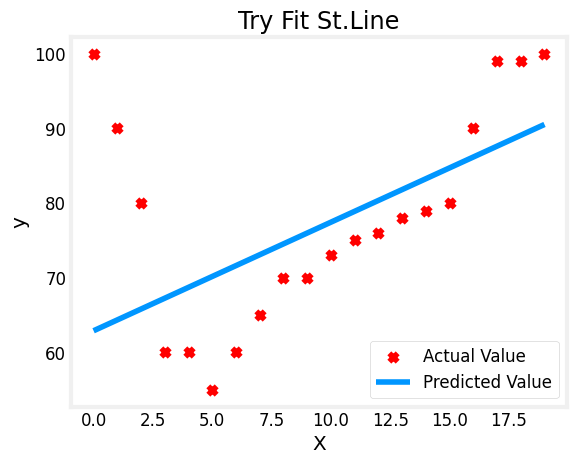

Lets apply all concept learnt:
1. Choosing Polynomial Model with Engineered Features upto 13th order, cause data seems to be more Nuanced!
2. I've to Normalize the input features to be in same scale, apply Z-score.
3. Using Gradient Descent to find Minimas of errors.
4. Alpha to 0.1 which has worked well so far.
5. Many iterations to get w's proper, from 1L to 10L.

Lets put this in code!

In [ ]:
x = np.arange(0,20,1)
y = [100,90,80,60,60,55,60,65,70,70,73,75,76,78,79,80,90,99,99,100]
X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13, x**14, x**15]

X = zscore_normalize_features(X)

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Perfect Fit")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

#### Perrrrfecttttoooo

**MY Check List:**

1. **Choice of Model and Feature Eng**: For real time data choose Polynomial Regression, curve fitting over st.line fit. You do this via Feature Engneering! starting off with 3rd order to as max as 15th or more order! Try!
2. **Normalize Features**: All features need to be brought to same class for best fit and visualization, otherwise descent iterations and alpha overloads. Thus use Z-score on input features.
3. **Gradient descent sq. error minima!** : Use this algo to find minimum squred error/cost/loss.
4. **Pick 0.1 learning rate**: Most of the cases near 0 to 1 alpha, moderate 0.1 alphs always works for above descent.
5. **Iterations**: can start with 10K->1L->10L.

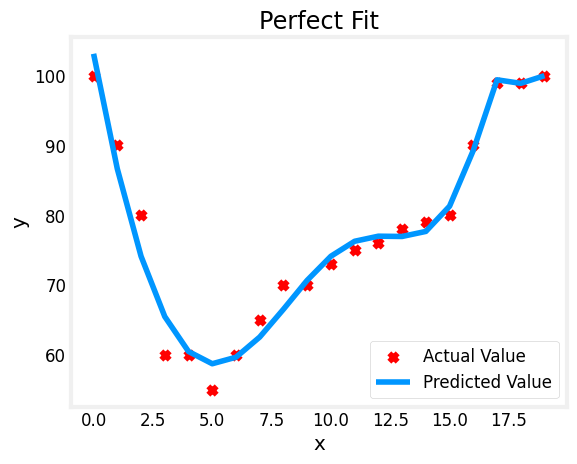

### Thus Ploynomial according to me is best in picking a nuanced data ques and fits well for all real time variations.